In [34]:
import numpy as np
import init_notebook
import data_preparation
import os
from numpy.linalg import lstsq
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Part 1

In [35]:
file_x0 = os.path.join('..', 'data', 'task_2', 'linear_vectorfield_data_x0.txt')
file_x1 = os.path.join('..', 'data', 'task_2', 'linear_vectorfield_data_x1.txt')


#Loading the data
data_x0 = data_preparation.load_data(file_x0)
data_x1 = data_preparation.load_data(file_x1)

#Printing the first few rows of data_x0
print("First few rows of data_x0:")
print(data_x0[:5])  

#Printing the first few rows of data_x1
print("\nFirst few rows of data_x1:")
print(data_x1[:5])  


First few rows of data_x0:
[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]
 [-0.62747958 -0.30887855]
 [-0.20646505  0.07763347]]

First few rows of data_x1:
[[-0.14754604  0.40615976]
 [-0.95959557 -0.31111473]
 [-0.6905276  -0.70449721]
 [-0.60367342 -0.2502033 ]
 [-0.19447451  0.07977735]]


In [36]:
#Computing the finite differences using the data loaded in the previous cell
delta_t = 0.1  # The time step from task 2
finite_diffs = data_preparation.compute_finite_differences(data_x0, data_x1, delta_t)

#Checking the finite differences computation
print("First few finite difference vectors:")
print(finite_diffs[:5])  #This prints the first 5 entries to check if they look correct


First few finite difference vectors:
[[ 0.18409949 -0.34489229]
 [ 0.40175684  0.84220121]
 [ 0.15960619  1.10825597]
 [ 0.23806159  0.58675244]
 [ 0.11990545  0.02143879]]


Supervised Learning to approximate Matrix A

In [37]:
#Performing the linear regression to approximate matrix A

#Preparing the data for the regression
#The x0 data (X) and the finite differences (Y)
X = data_x0
Y = finite_diffs

#Performing the regression using least squares
#We assume that the relationship goes through the origin, so no need to add a bias term
A_estimated, residuals, rank, s = lstsq(X, Y, rcond=None)

#Printing the estimated matrix A
print("Estimated matrix A:")
print(A_estimated)

#Printing the residuals to check how well the estimated matrix A fits the data
print("Residuals:")
print(residuals)

Estimated matrix A:
[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]
Residuals:
[2.33813513e-12 8.19405021e-12]


# Part 2
Solving the linear system using the estimated matrix A

In [38]:
#Defining the linear system as a function
def linear_system(t, x, A_hat):
    return A_hat @ x

#Initializing an array to hold the estimated points
x1_estimated = np.zeros_like(data_x0)

#Solving the system for each initial condition
for i, x0 in enumerate(data_x0):
    sol = solve_ivp(linear_system, [0, delta_t], x0, args=(A_estimated,), method='RK45', t_eval=[delta_t])
    x1_estimated[i] = sol.y[:, -1]


Computing the mean squared error (MSE)

In [39]:
#Computing the mean squared error between the estimated x1 and the known x1
mse = np.mean(np.sum((data_x1 - x1_estimated)**2, axis=1))
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0030599275959897333


# Part 3

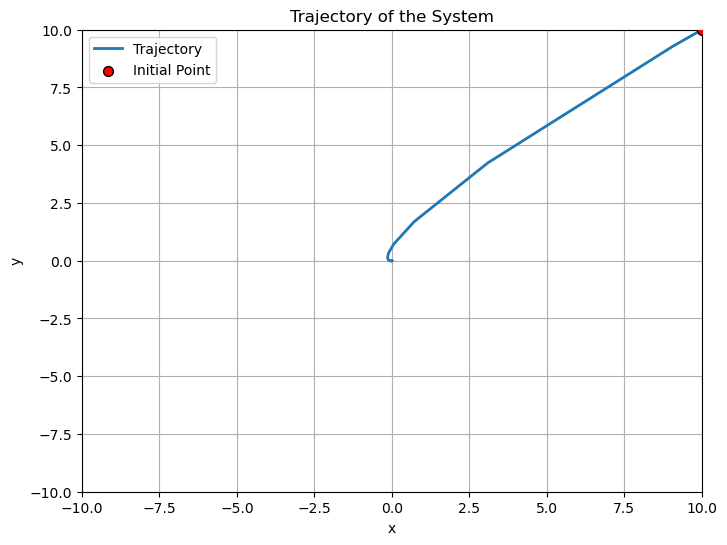

In [54]:
#Defining the initial point and the time span for integration
initial_point = np.array([10, 10])
t_span = (0, 100)

#Solving the system from the initial point
sol = solve_ivp(linear_system, t_span, initial_point, args=(A_estimated,), method='RK45', dense_output=True)

#Plotting the trajectory
plt.figure(figsize=(8, 6))
plt.plot(sol.y[0], sol.y[1], label='Trajectory', linewidth=2)
plt.scatter(*initial_point, color='red', label='Initial Point', s=50)
plt.title('Trajectory of the System')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

Generate and plot the phase portrait

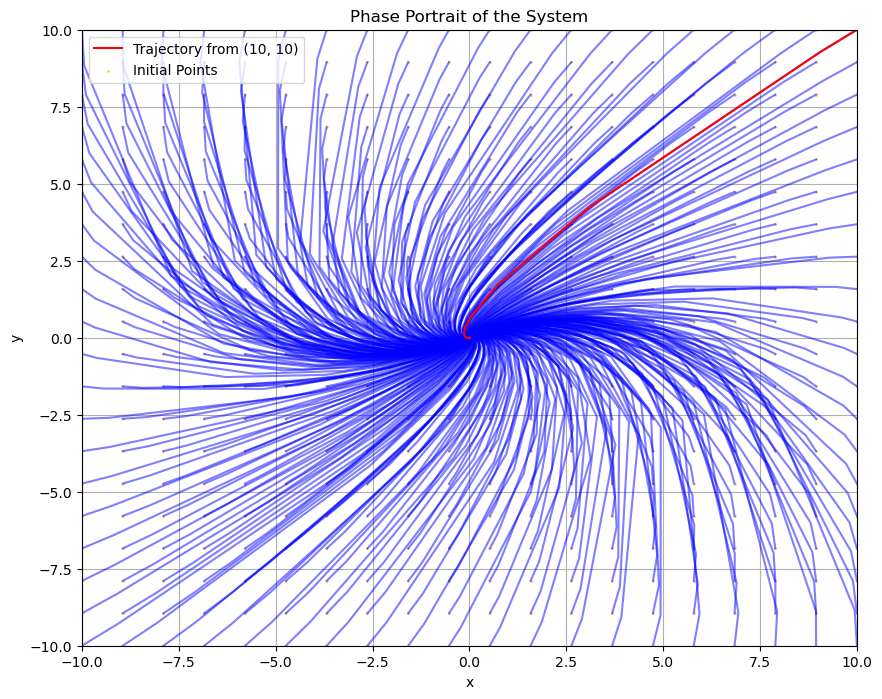

In [44]:

#Creating a grid of initial points for the phase portrait within the domain [-10, 10]^2
x_values = np.linspace(-10, 10, 20)
y_values = np.linspace(-10, 10, 20)
initial_points_grid = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2)

#Plotting the phase portrait
plt.figure(figsize=(10, 8))

for point in initial_points_grid:
    # Solve the system for each point in the grid
    sol = solve_ivp(linear_system, t_span, point, args=(A_estimated,), method='RK45')
    
    # Plot each trajectory
    plt.plot(sol.y[0], sol.y[1], color='blue', alpha=0.5)

#Overlaying the trajectory from the initial point (10, 10) for contrast
sol_special = solve_ivp(linear_system, t_span, initial_point, args=(A_estimated,), method='RK45', dense_output=True)
plt.plot(sol_special.y[0], sol_special.y[1], color='red', label='Trajectory from (10, 10)')

#Adding details to the plot
plt.scatter(initial_points_grid[:, 0], initial_points_grid[:, 1], color='orange', label='Initial Points', alpha=0.5, s=1)
plt.title('Phase Portrait of the System')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
